In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error

from lstm import lstm_model
from data_processing import generate_data

In [2]:
LOG_DIR = './ops_logs/sin'
TIMESTEPS = 3
RNN_LAYERS = [{'num_units': 5}]
DENSE_LAYERS = None
TRAINING_STEPS = 10000
PRINT_STEPS = TRAINING_STEPS / 10
BATCH_SIZE = 100

In [3]:
regressor = learn.SKCompat(learn.Estimator(
    model_fn=lstm_model(
        TIMESTEPS,
        RNN_LAYERS,
        DENSE_LAYERS
    ),
    model_dir=LOG_DIR
))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fba3d465390>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [3]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000, dtype=np.float32), TIMESTEPS, seperate=False)

# # create a lstm instance and validation monitor
# validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
#                                                      every_n_steps=PRINT_STEPS,
#                                                      early_stopping_rounds=1000)
# # print(X['train'])
# # print(y['train'])

# regressor.fit(X['train'], y['train'], 
#               monitors=[validation_monitor], 
#               batch_size=BATCH_SIZE,
#               steps=TRAINING_STEPS)

/home/clive69/Desktop/Sequence Predictions/tensorflow-lstm-regression/data_processing.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_ = data.iloc[i: i + time_steps].as_matrix()
/home/clive69/Desktop/Sequence Predictions/tensorflow-lstm-regression/data_processing.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  rnn_df.append(data.iloc[i + time_steps].as_matrix())


<class 'dict'>
dict_keys(['train', 'val', 'test'])
(8097, 3, 1)


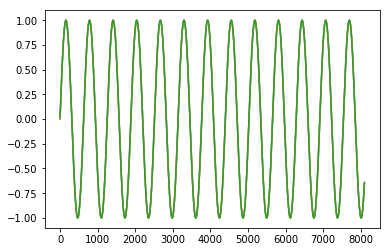

In [14]:
print(type(X))
print(X.keys())
print(X['train'].shape)
# print(X['train'][0:2])
# print(y['train'][0:2])

plt.plot(X['train'].reshape(-1,3))


(8097, 1)


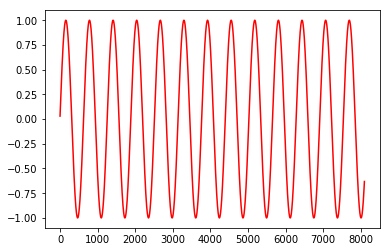

In [16]:
plt.plot(y['train'],c ='r')
print(y['train'].shape)

In [ ]:
print(y['train'])

In [5]:
predicted = regressor.predict(X['test'])
rmse = np.sqrt(((predicted - y['test']) ** 2).mean(axis=0))
score = mean_squared_error(predicted, y['test'])
print ("MSE: %f" % score)

Instructions for updating:
Use `tf.contrib.losses.mean_squared_error` and explicit logits computation.
Instructions for updating:
Use tf.losses.mean_squared_error instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
INFO:tensorflow:Restoring parameters from ./ops_logs/sin/model.ckpt-20000
MSE: 0.000142


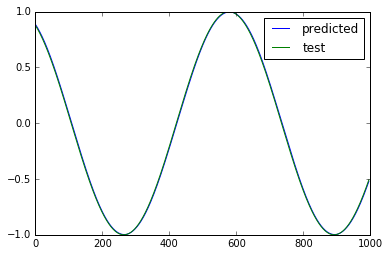

In [6]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])